In [ ]:
import warnings
warnings.filterwarnings('ignore')
from torchvision import models
import numpy as np
import cv2
import requests
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image, \
    deprocess_image, \
    preprocess_image
from PIL import Image
from model import Classifier_model
# model = models.densenet121(pretrained=True)
_model_name = "../work_dirs/DenseNet121_ImageNet_20220709052011/DenseNet121_ImageNet_run_0.pth.tar"
model, _ = Classifier_model('DenseNet121'.lower(), 14, weight=_model_name,
                          linear_classifier=False, sobel=False,
                          activation=None)
model.eval()
# image_url = "https://th.bing.com/th/id/R.94b33a074b9ceeb27b1c7fba0f66db74?rik=wN27mvigyFlXGg&riu=http%3a%2f%2fimages5.fanpop.com%2fimage%2fphotos%2f31400000%2fBear-Wallpaper-bears-31446777-1600-1200.jpg&ehk=oD0JPpRVTZZ6yizZtGQtnsBGK2pAap2xv3sU3A4bIMc%3d&risl=&pid=ImgRaw&r=0"
# img = np.array(Image.open(requests.get(image_url, stream=True).raw))
# img = cv2.resize(img, (224, 224))
# img = np.float32(img) / 255
# input_tensor = preprocess_image(img, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# # The target for the CAM is the Bear category.
# # As usual for classication, the target is the logit output
# # before softmax, for that category.
# targets = [ClassifierOutputTarget(295)]
# target_layers = [model.features.denseblock4]
# with GradCAM(model=model, target_layers=target_layers) as cam:
#     grayscale_cams = cam(input_tensor=input_tensor, targets=targets)
#     cam_image = show_cam_on_image(img, grayscale_cams[0, :], use_rgb=True)
# cam = np.uint8(255*grayscale_cams[0, :])
# cam = cv2.merge([cam, cam, cam])
# images = np.hstack((np.uint8(255*img), cam , cam_image))
# Image.fromarray(images)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
bbox_data = pd.read_csv('/home/jfxiao/Med_Datasets/nih_chestxray/BBox_List_2017.csv')
images_index = bbox_data['Image Index'].to_list()
image_root = '/home/jfxiao/Med_Datasets/nih_chestxray/images/'
normalize = 'imagenet'


_model_name = "../work_dirs/DenseNet121_ImageNet_20220709052011/DenseNet121_ImageNet_run_0.pth.tar"
model, _ = Classifier_model('DenseNet121'.lower(), 14, weight=_model_name,
                          linear_classifier=False, sobel=False,
                          activation=None)
model.eval()


# # The target for the CAM is the Bear category.
# # As usual for classication, the target is the logit output
# # before softmax, for that category.
# targets = [ClassifierOutputTarget(295)]
# target_layers = [model.features.denseblock4]
# with GradCAM(model=model, target_layers=target_layers) as cam:
#     grayscale_cams = cam(input_tensor=input_tensor, targets=targets)
#     cam_image = show_cam_on_image(img, grayscale_cams[0, :], use_rgb=True)
# cam = np.uint8(255*grayscale_cams[0, :])
# cam = cv2.merge([cam, cam, cam])
# images = np.hstack((np.uint8(255*img), cam , cam_image))
# Image.fromarray(images)

if normalize.lower() == "imagenet":
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
elif normalize.lower() == "chestx-ray":
    mean = [0.5056, 0.5056, 0.5056]
    std = [0.252, 0.252, 0.252]
#     self.normalize = transforms.Normalize([0.5056, 0.5056, 0.5056], [0.252, 0.252, 0.252])





class_name = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltrate', 'Mass', 'Nodule',
                       'Pneumonia', 'Pneumothorax', 'Consolidation', 'Edema',
                       'Emphysema', 'Fibrosis', 'Pleural_Thickening', 'Hernia']


class_to_idx = {cls: idx for (idx, cls) in enumerate(class_name)}
    

In [ ]:
_model_name = "../work_dirs/DenseNet121_ImageNet_20220709052011/DenseNet121_ImageNet_run_0.pth.tar"
model, _ = Classifier_model('DenseNet121'.lower(), 14, weight=_model_name,
                          linear_classifier=False, sobel=False,
                          activation=None)
fc_layer_specific_class = torch.nn.Linear(in_features=1024, out_features=1, bias=True)
fc_layer_specific_class.weight.data = model.classifier.weight[0:1]
fc_layer_specific_class.bias.data = model.classifier.bias[0:1]
model.classifier = fc_layer_specific_class

In [ ]:
class_to_idx

{'Atelectasis': 0,
 'Cardiomegaly': 1,
 'Effusion': 2,
 'Infiltrate': 3,
 'Mass': 4,
 'Nodule': 5,
 'Pneumonia': 6,
 'Pneumothorax': 7,
 'Consolidation': 8,
 'Edema': 9,
 'Emphysema': 10,
 'Fibrosis': 11,
 'Pleural_Thickening': 12,
 'Hernia': 13}

In [ ]:
for name in bbox_data["Finding Label"]:
    if name not in class_to_idx.keys():
        print(name)


In [ ]:
import torch
import warnings
warnings.filterwarnings('ignore')
from torchvision import models
import numpy as np
import cv2
import requests
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image, \
    deprocess_image, \
    preprocess_image
from PIL import Image
from model import Classifier_model

import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from torchvision.ops import box_iou
import copy
import os

plt.rcParams['figure.figsize'] = [24, 24]

def draw_bbox(image, start_point, end_point, color, thickness):
    image = cv2.rectangle(image, start_point, end_point, color, thickness)
    return image

bbox_data = pd.read_csv('/home/jfxiao/Med_Datasets/nih_chestxray/BBox_List_2017.csv')
images_index = bbox_data['Image Index'].to_list()
image_root = '/home/jfxiao/Med_Datasets/nih_chestxray/images/'
normalize = 'imagenet'


_model_name = "../work_dirs/DenseNet121_ImageNet_20220709052011/DenseNet121_ImageNet_run_0.pth.tar"
checkpoint = torch.load(_model_name)

model, _ = Classifier_model('DenseNet121'.lower(), 14, weight=None,
                          linear_classifier=False, sobel=False,
                          activation="Sigmoid")
model.load_state_dict(checkpoint['state_dict'])
model.eval()




if normalize.lower() == "imagenet":
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
elif normalize.lower() == "chestx-ray":
    mean = [0.5056, 0.5056, 0.5056]
    std = [0.252, 0.252, 0.252]
#     self.normalize = transforms.Normalize([0.5056, 0.5056, 0.5056], [0.252, 0.252, 0.252])



output_dir = '../work_dirs/visualization/densenet121/'

class_name = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltrate', 'Mass', 'Nodule',
                       'Pneumonia', 'Pneumothorax', 'Consolidation', 'Edema',
                       'Emphysema', 'Fibrosis', 'Pleural_Thickening', 'Hernia']


class_to_idx = {cls: idx for (idx, cls) in enumerate(class_name)}


# targets=None
target_layers = [model.features.denseblock4]


count = 0
results = {
            "file_name": [],
            "disease": [],
            "box_gt_x1": [],
            "box_gt_y1": [],
            "box_gt_x2": [],
            "box_gt_y2": [],
            "box_pred_x1": [],
            "box_pred_y1": [],
            "box_pred_x2": [],
            "box_pred_y2": [], 
            "iou": [],
          }

bbox_data = pd.read_csv('/home/jfxiao/Med_Datasets/nih_chestxray/BBox_List_2017.csv')
bbox_data_filtered = bbox_data[bbox_data.groupby('Image Index')['Image Index'].transform('size') == 1]

for index, row in bbox_data_filtered.iterrows():
    class_idx = class_to_idx[row["Finding Label"]]
    print(row["Finding Label"], class_idx)
    targets = [ClassifierOutputTarget(class_idx)]
    image_name = row['Image Index']
    img = cv2.imread(image_root + '/' + image_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = np.float32(img) / 255
    input_tensor = preprocess_image(img, mean=mean, std=std)

    x = row['Bbox [x'] * 224 / 1024
    y = row['y'] * 224 / 1024
    w = row['w'] * 224 / 1024
    h = row['h]'] * 224 / 1024
    

    x1 = int(x)
    x2 = int(x+w)
    y1 = int(y)
    y2 = int(y+h)
    start_point = (x1,y1)
    end_point = (x2, y2)

#     image_with_bbox = draw_bbox(img, start_point, end_point, (255, 0, 0), 2)
    with GradCAM(model=model, target_layers=target_layers, use_cuda=True) as cam:
        grayscale_cams = cam(input_tensor=input_tensor, targets=targets)
        cam_image = show_cam_on_image(img, grayscale_cams[0, :], use_rgb=True)
        grayscale_cam = np.uint8(255*grayscale_cams[0, :])
        grayscale_cam_thres = copy.copy(grayscale_cam)
        grayscale_cam_thres[grayscale_cam_thres<150] = 0
        box_pred = get_largest_obj(grayscale_cam_thres)
        grayscale_cam = cv2.merge([grayscale_cam, grayscale_cam, grayscale_cam])
        box_gt = start_point + end_point
        print(box_gt)
        print(box_pred)
        iou = (box_iou(torch.tensor(box_gt).unsqueeze(dim=0), torch.tensor(box_pred).unsqueeze(dim=0)))
    #         start_point_pred = (int(pred_box[0][0] - 0.5 * pred_box[1][0]),pred_box[0][1] - 0.5 * pred_box[1][1])
    #         end_pointd_pred = (pred_box[0][0] + 0.5 * pred_box[1][0], pred_box[0][1] + 0.5 * pred_box[1][1])
        cam_image = draw_bbox(cam_image, start_point, end_point, (255, 255, 255), 2)
        grayscale_cam = draw_bbox(grayscale_cam, (box_pred[0], box_pred[1]), (box_pred[2], box_pred[3]), (255, 255, 255), 2)
    #         grayscale_cam = draw_bbox(grayscale_cam, start_point, end_point, (255, 255, 255), 2)
        images = np.hstack((np.uint8(255*img), grayscale_cam, cam_image))
        gradcam_only_image_name = image_name.replace('.png', '_gradcam_only.png')
        with_gradcam_image_name = image_name.replace('.png', '_with_gradcam.png')
        raw_image_name = os.path.join(output_dir, image_name)
        gradcam_only_name = os.path.join(output_dir, gradcam_only_image_name)
        with_gradcam_name = os.path.join(output_dir, with_gradcam_image_name)
        cv2.imwrite(raw_image_name, cv2.cvtColor(np.uint8(255*img), cv2.COLOR_RGB2BGR)) 
        cv2.imwrite(gradcam_only_name, cv2.cvtColor(grayscale_cam, cv2.COLOR_RGB2BGR)) 
        cv2.imwrite(with_gradcam_name, cv2.cvtColor(cam_image, cv2.COLOR_RGB2BGR)) 
#         Image.fromarray(images)
    results['file_name'].append(image_name)  
    results['disease'].append(row["Finding Label"]) 
    results["box_gt_x1"].append(box_gt[0])
    results["box_gt_y1"].append(box_gt[1])
    results["box_gt_x2"].append(box_gt[2])
    results["box_gt_y2"].append(box_gt[3])
    results["box_pred_x1"].append(box_pred[0])
    results["box_pred_y1"].append(box_pred[1])
    results["box_pred_x2"].append(box_pred[2])
    results["box_pred_y2"].append(box_pred[3])
    results["iou"].append(iou[0][0].item())
#     plt.figure()
#     plt.imshow(images)
    count += 1



Atelectasis 0
(49, 119, 68, 136)
(0, 119, 75, 166)
Atelectasis 0
(150, 28, 190, 97)
(128, 31, 193, 123)
Atelectasis 0
(48, 69, 82, 116)
(167, 0, 223, 90)
Atelectasis 0
(158, 108, 189, 120)
(121, 67, 223, 160)
Atelectasis 0
(144, 124, 188, 141)
(0, 72, 61, 153)
Atelectasis 0
(130, 110, 142, 150)
(186, 0, 223, 60)
Atelectasis 0
(63, 139, 81, 151)
(0, 151, 67, 223)
Atelectasis 0
(108, 126, 167, 159)
(109, 132, 178, 194)
Atelectasis 0
(147, 112, 169, 154)
(51, 163, 223, 223)
Atelectasis 0
(75, 102, 98, 124)
(53, 0, 92, 60)
Atelectasis 0
(138, 55, 188, 101)
(126, 44, 171, 165)
Atelectasis 0
(15, 103, 81, 139)
(168, 45, 223, 141)
Atelectasis 0
(122, 84, 171, 120)
(96, 41, 185, 141)
Atelectasis 0
(67, 87, 114, 134)
(61, 31, 223, 124)
Atelectasis 0
(183, 136, 200, 145)
(59, 0, 166, 30)
Atelectasis 0
(137, 89, 193, 122)
(24, 29, 223, 175)
Atelectasis 0
(28, 154, 77, 181)
(0, 145, 78, 223)
Atelectasis 0
(45, 124, 92, 180)
(105, 120, 180, 223)
Atelectasis 0
(34, 141, 91, 190)
(49, 78, 115, 166)
A

Cardiomegaly 1
(98, 96, 184, 156)
(94, 70, 190, 154)
Cardiomegaly 1
(72, 106, 183, 182)
(90, 79, 182, 169)
Cardiomegaly 1
(62, 96, 174, 171)
(87, 100, 145, 160)
Cardiomegaly 1
(67, 87, 178, 162)
(43, 66, 137, 150)
Cardiomegaly 1
(79, 105, 167, 170)
(73, 60, 167, 153)
Cardiomegaly 1
(74, 101, 165, 187)
(141, 93, 202, 180)
Cardiomegaly 1
(68, 75, 176, 160)
(95, 45, 184, 136)
Cardiomegaly 1
(77, 100, 175, 158)
(68, 71, 158, 157)
Cardiomegaly 1
(105, 86, 198, 161)
(63, 53, 173, 148)
Cardiomegaly 1
(72, 85, 168, 157)
(44, 0, 154, 194)
Cardiomegaly 1
(71, 91, 161, 165)
(58, 57, 166, 138)
Cardiomegaly 1
(91, 83, 188, 147)
(103, 62, 194, 146)
Cardiomegaly 1
(120, 76, 201, 148)
(77, 37, 172, 136)
Cardiomegaly 1
(74, 92, 161, 165)
(82, 66, 162, 152)
Cardiomegaly 1
(84, 85, 183, 152)
(76, 60, 175, 148)
Cardiomegaly 1
(96, 95, 194, 184)
(0, 0, 116, 54)
Cardiomegaly 1
(77, 99, 176, 192)
(96, 98, 179, 189)
Cardiomegaly 1
(75, 65, 173, 148)
(59, 23, 204, 157)
Cardiomegaly 1
(72, 98, 166, 167)
(0, 47,

Effusion 2
(43, 39, 85, 100)
(119, 114, 196, 207)
Effusion 2
(133, 86, 202, 176)
(108, 68, 194, 143)
Effusion 2
(138, 137, 179, 220)
(63, 95, 176, 177)
Effusion 2
(39, 20, 119, 148)
(36, 0, 205, 112)
Effusion 2
(5, 26, 63, 163)
(36, 61, 181, 144)
Effusion 2
(16, 20, 73, 211)
(0, 34, 83, 117)
Effusion 2
(130, 23, 197, 172)
(100, 35, 188, 122)
Effusion 2
(36, 34, 78, 152)
(40, 67, 149, 144)
Effusion 2
(163, 33, 217, 177)
(18, 127, 100, 198)
Effusion 2
(61, 5, 107, 122)
(42, 38, 136, 105)
Effusion 2
(33, 31, 96, 166)
(0, 59, 79, 148)
Effusion 2
(26, 103, 56, 169)
(57, 85, 179, 163)
Effusion 2
(54, 38, 93, 86)
(0, 168, 85, 223)
Effusion 2
(168, 49, 213, 127)
(0, 25, 87, 103)
Effusion 2
(10, 65, 44, 167)
(33, 94, 160, 172)
Effusion 2
(31, 41, 82, 146)
(64, 74, 144, 186)
Effusion 2
(4, 53, 51, 154)
(0, 79, 70, 160)
Effusion 2
(130, 126, 172, 192)
(0, 58, 180, 143)
Effusion 2
(151, 90, 200, 164)
(66, 83, 160, 160)
Effusion 2
(33, 16, 93, 96)
(33, 0, 186, 124)
Effusion 2
(159, 82, 190, 128)
(4

Mass 4
(93, 49, 162, 125)
(96, 64, 181, 163)
Mass 4
(50, 93, 76, 120)
(0, 56, 28, 168)
Mass 4
(168, 105, 184, 122)
(59, 41, 158, 147)
Mass 4
(45, 51, 90, 96)
(17, 57, 92, 139)
Mass 4
(44, 107, 71, 133)
(18, 75, 191, 166)
Mass 4
(47, 148, 67, 175)
(21, 110, 114, 199)
Mass 4
(150, 87, 174, 114)
(109, 68, 195, 160)
Mass 4
(169, 58, 193, 88)
(63, 39, 223, 158)
Mass 4
(137, 74, 181, 118)
(122, 64, 198, 151)
Mass 4
(151, 31, 192, 76)
(122, 25, 223, 114)
Mass 4
(158, 68, 182, 89)
(127, 67, 188, 173)
Mass 4
(149, 51, 164, 64)
(0, 168, 223, 223)
Mass 4
(134, 92, 183, 156)
(122, 69, 199, 158)
Mass 4
(141, 83, 179, 121)
(27, 132, 223, 202)
Mass 4
(61, 42, 127, 146)
(38, 75, 118, 163)
Mass 4
(41, 85, 69, 135)
(0, 63, 133, 157)
Mass 4
(137, 74, 159, 92)
(24, 136, 223, 223)
Mass 4
(42, 123, 65, 142)
(36, 120, 166, 189)
Mass 4
(37, 40, 94, 111)
(33, 41, 117, 130)
Mass 4
(82, 49, 105, 78)
(41, 50, 129, 144)
Mass 4
(80, 129, 106, 161)
(24, 166, 174, 223)
Mass 4
(71, 72, 98, 106)
(48, 78, 181, 179)
Mass

Pneumonia 6
(62, 62, 103, 140)
(19, 195, 97, 223)
Pneumonia 6
(26, 110, 78, 170)
(0, 131, 191, 204)
Pneumonia 6
(127, 92, 173, 156)
(37, 78, 144, 167)
Pneumonia 6
(52, 74, 83, 125)
(27, 0, 90, 57)
Pneumonia 6
(31, 125, 76, 177)
(16, 102, 120, 189)
Pneumonia 6
(42, 172, 88, 201)
(91, 195, 124, 223)
Pneumonia 6
(37, 71, 94, 183)
(27, 74, 100, 163)
Pneumonia 6
(133, 116, 181, 183)
(66, 0, 184, 90)
Pneumonia 6
(55, 65, 93, 151)
(42, 67, 130, 157)
Pneumonia 6
(135, 144, 208, 187)
(147, 189, 223, 223)
Pneumonia 6
(55, 114, 103, 195)
(58, 122, 170, 223)
Pneumonia 6
(45, 74, 92, 156)
(34, 126, 92, 223)
Pneumonia 6
(44, 123, 91, 146)
(179, 0, 223, 38)
Pneumonia 6
(68, 81, 108, 138)
(0, 159, 87, 223)
Pneumonia 6
(37, 116, 85, 156)
(131, 0, 223, 30)
Pneumonia 6
(129, 57, 192, 163)
(27, 58, 223, 193)
Pneumonia 6
(44, 121, 88, 155)
(29, 70, 123, 163)
Pneumonia 6
(137, 91, 187, 144)
(62, 49, 158, 149)
Pneumonia 6
(121, 126, 159, 169)
(104, 106, 182, 192)
Pneumonia 6
(41, 82, 100, 164)
(128, 70, 201,

NameError: name 'df' is not defined

In [ ]:
import torch
import warnings
warnings.filterwarnings('ignore')
from torchvision import models
import numpy as np
import cv2
import requests
from pytorch_grad_cam import GradCAM, ScoreCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image, \
    deprocess_image, \
    preprocess_image
from PIL import Image
from model import Classifier_model

import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from torchvision.ops import box_iou
import copy
import os
import sys
sys.path.append('../')

import models_vit
plt.rcParams['figure.figsize'] = [24, 24]

def draw_bbox(image, start_point, end_point, color, thickness):
    image = cv2.rectangle(image, start_point, end_point, color, thickness)
    return image




bbox_data = pd.read_csv('/home/jfxiao/Med_Datasets/nih_chestxray/BBox_List_2017.csv')
images_index = bbox_data['Image Index'].to_list()
image_root = '/home/jfxiao/Med_Datasets/nih_chestxray/images/'



# _model_name = "../work_dirs/DenseNet121_ImageNet_20220709052011/DenseNet121_ImageNet_run_0.pth.tar"





model = models_vit.vit_small_patch16(
    num_classes=14,
    drop_path_rate=0.2,
    global_pool=True,
)
model.cuda()
checkpoint = torch.load('../work_dirs/finetune_exp60_chexpert_nih_pretrained_mask90_vit_small_75e_baseline_RRC_randaug_m6_ld55_e1/checkpoint-74.pth', map_location='cpu')
model.load_state_dict(checkpoint['model'], strict=True)

model.eval()

normalize = 'chestx-ray'

if normalize.lower() == "imagenet":
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
elif normalize.lower() == "chestx-ray":
    mean = [0.5056, 0.5056, 0.5056]
    std = [0.252, 0.252, 0.252]


output_dir = '../work_dirs/visualization/vit_s/'

class_name = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltrate', 'Mass', 'Nodule',
                       'Pneumonia', 'Pneumothorax', 'Consolidation', 'Edema',
                       'Emphysema', 'Fibrosis', 'Pleural_Thickening', 'Hernia']


class_to_idx = {cls: idx for (idx, cls) in enumerate(class_name)}



def reshape_transform(tensor, height=14, width=14):
    result = tensor[:, 1:, :].reshape(tensor.size(0),
                                      height, width, tensor.size(2))

    # Bring the channels to the first dimension,
    # like in CNNs.
    result = result.transpose(2, 3).transpose(1, 2)
    return result




# targets=None
target_layers = [model.blocks[-1].norm1]


count = 0
results_vit = {
            "file_name": [],
            "disease": [],
            "box_gt_x1": [],
            "box_gt_y1": [],
            "box_gt_x2": [],
            "box_gt_y2": [],
            "box_pred_x1": [],
            "box_pred_y1": [],
            "box_pred_x2": [],
            "box_pred_y2": [], 
            "iou": [],
          }

bbox_data = pd.read_csv('/home/jfxiao/Med_Datasets/nih_chestxray/BBox_List_2017.csv')
bbox_data_filtered = bbox_data[bbox_data.groupby('Image Index')['Image Index'].transform('size') == 1]

for index, row in bbox_data_filtered.iterrows():
    class_idx = class_to_idx[row["Finding Label"]]
    print(row["Finding Label"], class_idx)
    targets = [ClassifierOutputTarget(class_idx)]
    image_name = row['Image Index']
    img = cv2.imread(image_root + '/' + image_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = np.float32(img) / 255
    input_tensor = preprocess_image(img, mean=mean, std=std)

    x = row['Bbox [x'] * 224 / 1024
    y = row['y'] * 224 / 1024
    w = row['w'] * 224 / 1024
    h = row['h]'] * 224 / 1024
    

    x1 = int(x)
    x2 = int(x+w)
    y1 = int(y)
    y2 = int(y+h)
    start_point = (x1,y1)
    end_point = (x2, y2)

#     image_with_bbox = draw_bbox(img, start_point, end_point, (255, 0, 0), 2)
    with GradCAM(model=model, target_layers=target_layers, use_cuda=True, reshape_transform=reshape_transform) as cam:
        grayscale_cams = cam(input_tensor=input_tensor, targets=targets)
        cam_image = show_cam_on_image(img, grayscale_cams[0, :], use_rgb=True)
        grayscale_cam = np.uint8(255*grayscale_cams[0, :])
        grayscale_cam_thres = copy.copy(grayscale_cam)
        grayscale_cam_thres[grayscale_cam_thres<150] = 0
        box_pred = get_largest_obj(grayscale_cam_thres)
        grayscale_cam = cv2.merge([grayscale_cam, grayscale_cam, grayscale_cam])
        box_gt = start_point + end_point
        print(box_gt)
        print(box_pred)
        iou = (box_iou(torch.tensor(box_gt).unsqueeze(dim=0), torch.tensor(box_pred).unsqueeze(dim=0)))
        print(iou)
    #         start_point_pred = (int(pred_box[0][0] - 0.5 * pred_box[1][0]),pred_box[0][1] - 0.5 * pred_box[1][1])
    #         end_pointd_pred = (pred_box[0][0] + 0.5 * pred_box[1][0], pred_box[0][1] + 0.5 * pred_box[1][1])
        cam_image = draw_bbox(cam_image, start_point, end_point, (255, 255, 255), 2)
        grayscale_cam = draw_bbox(grayscale_cam, (box_pred[0], box_pred[1]), (box_pred[2], box_pred[3]), (255, 255, 255), 2)
    #         grayscale_cam = draw_bbox(grayscale_cam, start_point, end_point, (255, 255, 255), 2)
        images = np.hstack((np.uint8(255*img), grayscale_cam, cam_image))
        gradcam_only_image_name = image_name.replace('.png', '_gradcam_only.png')
        with_gradcam_image_name = image_name.replace('.png', '_with_gradcam.png')
        raw_image_name = os.path.join(output_dir, image_name)
        gradcam_only_name = os.path.join(output_dir, gradcam_only_image_name)
        with_gradcam_name = os.path.join(output_dir, with_gradcam_image_name)
        cv2.imwrite(raw_image_name, cv2.cvtColor(np.uint8(255*img), cv2.COLOR_RGB2BGR)) 
        cv2.imwrite(gradcam_only_name, cv2.cvtColor(grayscale_cam, cv2.COLOR_RGB2BGR)) 
        cv2.imwrite(with_gradcam_name, cv2.cvtColor(cam_image, cv2.COLOR_RGB2BGR)) 
#         Image.fromarray(images)
    results_vit['file_name'].append(image_name)  
    results_vit['disease'].append(row["Finding Label"]) 
    results_vit["box_gt_x1"].append(box_gt[0])
    results_vit["box_gt_y1"].append(box_gt[1])
    results_vit["box_gt_x2"].append(box_gt[2])
    results_vit["box_gt_y2"].append(box_gt[3])
    results_vit["box_pred_x1"].append(box_pred[0])
    results_vit["box_pred_y1"].append(box_pred[1])
    results_vit["box_pred_x2"].append(box_pred[2])
    results_vit["box_pred_y2"].append(box_pred[3])
    results_vit["iou"].append(iou[0][0].item())
#     plt.figure()
#     plt.imshow(images)
    count += 1

collect_df_vit = pd.DataFrame.from_dict(results_vit)
collect_df_vit.to_csv(os.path.join(output_dir, 'results.csv'), index=False)

Atelectasis 0
(49, 119, 68, 136)
(115, 161, 140, 174)
tensor([[0.]])
Atelectasis 0
(150, 28, 190, 97)
(94, 0, 132, 35)
tensor([[0.]])
Atelectasis 0
(48, 69, 82, 116)
(49, 92, 74, 110)
tensor([[0.2816]])
Atelectasis 0
(158, 108, 189, 120)
(158, 140, 181, 170)
tensor([[0.]])
Atelectasis 0
(144, 124, 188, 141)
(164, 124, 192, 144)
tensor([[0.4533]])
Atelectasis 0
(130, 110, 142, 150)
(49, 110, 74, 129)
tensor([[0.]])
Atelectasis 0
(63, 139, 81, 151)
(62, 128, 79, 142)
tensor([[0.1182]])
Atelectasis 0
(108, 126, 167, 159)
(19, 147, 40, 157)
tensor([[0.]])
Atelectasis 0
(147, 112, 169, 154)
(129, 116, 170, 144)
tensor([[0.4231]])
Atelectasis 0
(75, 102, 98, 124)
(38, 83, 93, 125)
tensor([[0.1636]])
Atelectasis 0
(138, 55, 188, 101)
(143, 161, 166, 174)
tensor([[0.]])
Atelectasis 0
(15, 103, 81, 139)
(16, 96, 77, 143)
tensor([[0.7207]])
Atelectasis 0
(122, 84, 171, 120)
(64, 97, 78, 110)
tensor([[0.]])
Atelectasis 0
(67, 87, 114, 134)
(177, 0, 190, 19)
tensor([[0.]])
Atelectasis 0
(183, 136,

(172, 93, 190, 121)
(148, 113, 189, 145)
tensor([[0.0810]])
Atelectasis 0
(154, 155, 187, 178)
(167, 161, 190, 176)
tensor([[0.3731]])
Atelectasis 0
(77, 124, 105, 142)
(143, 19, 191, 64)
tensor([[0.]])
Atelectasis 0
(158, 105, 191, 124)
(55, 128, 112, 142)
tensor([[0.]])
Atelectasis 0
(159, 164, 186, 185)
(164, 158, 193, 190)
tensor([[0.4472]])
Atelectasis 0
(26, 111, 63, 134)
(152, 118, 204, 162)
tensor([[0.]])
Atelectasis 0
(178, 118, 200, 134)
(55, 110, 95, 148)
tensor([[0.]])
Atelectasis 0
(136, 118, 161, 154)
(51, 142, 87, 158)
tensor([[0.]])
Atelectasis 0
(36, 129, 76, 147)
(49, 144, 77, 165)
tensor([[0.0660]])
Atelectasis 0
(47, 139, 95, 161)
(49, 143, 83, 161)
tensor([[0.5795]])
Atelectasis 0
(174, 146, 208, 164)
(49, 132, 79, 169)
tensor([[0.]])
Atelectasis 0
(145, 95, 182, 126)
(43, 96, 93, 111)
tensor([[0.]])
Atelectasis 0
(158, 147, 196, 169)
(155, 145, 201, 174)
tensor([[0.6267]])
Atelectasis 0
(40, 114, 76, 128)
(49, 113, 64, 126)
tensor([[0.3468]])
Atelectasis 0
(61, 11

(65, 76, 170, 166)
(100, 52, 138, 106)
tensor([[0.1100]])
Cardiomegaly 1
(36, 88, 181, 180)
(22, 101, 75, 161)
tensor([[0.1650]])
Cardiomegaly 1
(87, 104, 205, 202)
(113, 125, 160, 182)
tensor([[0.2317]])
Cardiomegaly 1
(47, 85, 165, 176)
(48, 100, 80, 143)
tensor([[0.1281]])
Cardiomegaly 1
(65, 95, 185, 182)
(120, 98, 162, 129)
tensor([[0.1247]])
Cardiomegaly 1
(84, 63, 181, 141)
(74, 78, 111, 118)
tensor([[0.1356]])
Cardiomegaly 1
(79, 72, 180, 153)
(136, 83, 174, 124)
tensor([[0.1904]])
Cardiomegaly 1
(63, 78, 179, 174)
(148, 102, 178, 143)
tensor([[0.1105]])
Cardiomegaly 1
(73, 60, 194, 145)
(135, 68, 185, 121)
tensor([[0.2577]])
Cardiomegaly 1
(78, 101, 193, 188)
(127, 93, 155, 114)
tensor([[0.0356]])
Cardiomegaly 1
(82, 101, 203, 181)
(127, 100, 189, 156)
tensor([[0.3500]])
Cardiomegaly 1
(72, 78, 178, 183)
(118, 77, 143, 112)
tensor([[0.0762]])
Cardiomegaly 1
(80, 79, 176, 166)
(143, 112, 186, 161)
tensor([[0.1829]])
Cardiomegaly 1
(77, 82, 185, 171)
(147, 112, 179, 148)
tensor(

(151, 93, 196, 179)
(0, 146, 15, 191)
tensor([[0.]])
Effusion 2
(170, 171, 198, 211)
(0, 180, 79, 223)
tensor([[0.]])
Effusion 2
(41, 101, 82, 173)
(139, 113, 176, 146)
tensor([[0.]])
Effusion 2
(158, 94, 196, 192)
(128, 123, 160, 142)
tensor([[0.0088]])
Effusion 2
(10, 74, 56, 197)
(145, 147, 223, 223)
tensor([[0.]])
Effusion 2
(152, 68, 210, 156)
(148, 65, 174, 91)
tensor([[0.0959]])
Effusion 2
(13, 68, 74, 166)
(33, 129, 50, 156)
tensor([[0.0768]])
Effusion 2
(4, 91, 39, 177)
(0, 135, 30, 223)
tensor([[0.2396]])
Effusion 2
(7, 78, 67, 144)
(62, 119, 103, 155)
tensor([[0.0235]])
Effusion 2
(18, 91, 68, 182)
(35, 97, 84, 158)
tensor([[0.3643]])
Effusion 2
(135, 21, 190, 170)
(148, 115, 188, 172)
tensor([[0.2659]])
Effusion 2
(168, 127, 204, 170)
(134, 104, 189, 154)
tensor([[0.1520]])
Effusion 2
(183, 155, 207, 187)
(193, 161, 223, 223)
tensor([[0.1608]])
Effusion 2
(173, 124, 209, 221)
(210, 181, 223, 223)
tensor([[0.]])
Effusion 2
(169, 78, 194, 131)
(142, 77, 172, 107)
tensor([[0.0

Mass 4
(174, 132, 193, 154)
(81, 45, 142, 176)
tensor([[0.]])
Mass 4
(125, 54, 151, 85)
(35, 65, 63, 93)
tensor([[0.]])
Mass 4
(149, 144, 167, 161)
(82, 49, 120, 114)
tensor([[0.]])
Mass 4
(156, 64, 185, 107)
(113, 77, 140, 124)
tensor([[0.]])
Mass 4
(163, 77, 185, 103)
(161, 81, 189, 96)
tensor([[0.4985]])
Mass 4
(141, 106, 162, 129)
(30, 127, 79, 162)
tensor([[0.]])
Mass 4
(57, 102, 154, 150)
(82, 67, 137, 154)
tensor([[0.3882]])
Mass 4
(93, 49, 162, 125)
(117, 64, 164, 123)
tensor([[0.4952]])
Mass 4
(50, 93, 76, 120)
(49, 97, 66, 114)
tensor([[0.3783]])
Mass 4
(168, 105, 184, 122)
(83, 49, 124, 93)
tensor([[0.]])
Mass 4
(45, 51, 90, 96)
(49, 53, 92, 85)
tensor([[0.6281]])
Mass 4
(44, 107, 71, 133)
(0, 44, 33, 160)
tensor([[0.]])
Mass 4
(47, 148, 67, 175)
(86, 49, 115, 93)
tensor([[0.]])
Mass 4
(150, 87, 174, 114)
(189, 88, 223, 145)
tensor([[0.]])
Mass 4
(169, 58, 193, 88)
(69, 62, 126, 135)
tensor([[0.]])
Mass 4
(137, 74, 181, 118)
(166, 94, 190, 116)
tensor([[0.1546]])
Mass 4
(151

Pneumonia 6
(153, 134, 201, 189)
(96, 146, 130, 182)
tensor([[0.]])
Pneumonia 6
(135, 104, 183, 146)
(130, 111, 176, 157)
tensor([[0.5321]])
Pneumonia 6
(129, 84, 182, 144)
(112, 53, 174, 133)
tensor([[0.3715]])
Pneumonia 6
(123, 50, 180, 177)
(188, 27, 223, 123)
tensor([[0.]])
Pneumonia 6
(117, 122, 179, 178)
(42, 111, 81, 191)
tensor([[0.]])
Pneumonia 6
(54, 76, 86, 100)
(55, 74, 95, 97)
tensor([[0.6278]])
Pneumonia 6
(120, 44, 158, 85)
(117, 47, 151, 80)
tensor([[0.6174]])
Pneumonia 6
(120, 106, 167, 155)
(84, 157, 124, 202)
tensor([[0.]])
Pneumonia 6
(40, 47, 196, 176)
(92, 198, 114, 223)
tensor([[0.]])
Pneumonia 6
(45, 75, 212, 178)
(144, 148, 177, 184)
tensor([[0.0569]])
Pneumonia 6
(116, 135, 169, 193)
(97, 52, 136, 92)
tensor([[0.]])
Pneumonia 6
(57, 129, 185, 194)
(70, 187, 108, 209)
tensor([[0.0299]])
Pneumonia 6
(139, 108, 179, 143)
(104, 131, 172, 176)
tensor([[0.0974]])
Pneumonia 6
(44, 88, 89, 162)
(98, 134, 149, 205)
tensor([[0.]])
Pneumonia 6
(34, 27, 190, 207)
(142, 89

(64, 140, 91, 161)
(16, 169, 30, 193)
tensor([[0.]])
Pneumothorax 7
(41, 26, 104, 78)
(49, 51, 72, 115)
tensor([[0.1505]])
Pneumothorax 7
(42, 45, 83, 169)
(46, 65, 70, 101)
tensor([[0.1699]])
Pneumothorax 7
(129, 21, 164, 76)
(176, 183, 208, 223)
tensor([[0.]])
Pneumothorax 7
(165, 149, 209, 202)
(164, 159, 190, 178)
tensor([[0.2020]])
Pneumothorax 7
(133, 39, 145, 94)
(33, 54, 65, 100)
tensor([[0.]])
Pneumothorax 7
(27, 166, 34, 174)
(20, 139, 82, 191)
tensor([[0.0174]])
Pneumothorax 7
(118, 9, 141, 21)
(34, 0, 62, 31)
tensor([[0.]])
Pneumothorax 7
(39, 123, 104, 173)
(79, 124, 110, 158)
tensor([[0.2461]])
Pneumothorax 7
(32, 20, 115, 144)
(75, 98, 98, 142)
tensor([[0.0983]])
Pneumothorax 7
(123, 24, 192, 80)
(208, 137, 223, 176)
tensor([[0.]])
Pneumothorax 7
(140, 21, 187, 49)
(30, 208, 45, 223)
tensor([[0.]])
Pneumothorax 7
(50, 38, 94, 72)
(0, 189, 25, 211)
tensor([[0.]])
Pneumothorax 7
(125, 27, 174, 48)
(0, 123, 12, 154)
tensor([[0.]])
Pneumothorax 7
(27, 57, 58, 155)
(63, 105, 

In [ ]:
collect_df_vit

,file_name,disease,box_gt_x1,box_gt_y1,box_gt_x2,box_gt_y2,box_pred_x1,box_pred_y1,box_pred_x2,box_pred_y2,iou
0,00013118_008.png,Atelectasis,49,119,68,136,115,161,140,174,0.000000
1,00014716_007.png,Atelectasis,150,28,190,97,94,0,132,35,0.000000
2,00029817_009.png,Atelectasis,48,69,82,116,49,92,74,110,0.281602
3,00014687_001.png,Atelectasis,158,108,189,120,158,140,181,170,0.000000
4,00017877_001.png,Atelectasis,144,124,188,141,164,124,192,144,0.453333
...,...,...,...,...,...,...,...,...,...,...,...
782,00029464_003.png,Atelectasis,53,81,98,110,64,112,101,136,0.000000
783,00001320_003.png,Atelectasis,45,119,61,125,32,133,84,161,0.000000
784,00013187_002.png,Atelectasis,43,124,205,162,48,127,98,151,0.194932
785,00025769_001.png,Atelectasis,153,125,176,139,141,127,160,142,0.160612


In [ ]:
collect_df = pd.DataFrame.from_dict(results)
collect_df.to_csv(os.path.join(output_dir, 'results.csv'), index=False)

In [ ]:
collect_df_vit[collect_df_vit["iou"] > 0.5]

,file_name,disease,box_gt_x1,box_gt_y1,box_gt_x2,box_gt_y2,box_pred_x1,box_pred_y1,box_pred_x2,box_pred_y2,iou
11,00003945_004.png,Atelectasis,15,103,81,139,16,96,77,143,0.720709
22,00016972_019.png,Atelectasis,112,138,177,188,120,133,178,185,0.746864
28,00027094_003.png,Atelectasis,168,122,201,155,172,125,209,161,0.560928
72,00015262_005.png,Atelectasis,30,116,62,138,29,109,72,137,0.543689
84,00016403_003.png,Atelectasis,195,191,219,206,203,189,223,206,0.521739
98,00009256_005.png,Atelectasis,66,86,91,111,65,95,91,112,0.599700
108,00019271_065.png,Atelectasis,46,109,77,133,49,111,79,141,0.599222
111,00009779_001.png,Atelectasis,155,108,191,123,156,111,189,129,0.536585
112,00012829_004.png,Atelectasis,36,118,73,138,37,112,63,138,0.580357
114,00029200_006.png,Atelectasis,28,111,63,136,33,113,61,140,0.652482


In [ ]:
collect_df[collect_df["iou"] > 0.5]

,file_name,disease,box_gt_x1,box_gt_y1,box_gt_x2,box_gt_y2,box_pred_x1,box_pred_y1,box_pred_x2,box_pred_y2,iou
22,00016972_019.png,Atelectasis,112,138,177,188,100,128,181,194,0.607931
56,00019271_064.png,Atelectasis,58,111,187,169,74,99,181,183,0.604638
66,00014253_042.png,Atelectasis,46,112,180,180,48,88,186,176,0.659588
143,00015770_010.png,Cardiomegaly,79,102,178,162,87,78,169,165,0.603385
144,00011463_002.png,Cardiomegaly,82,119,179,194,75,99,171,178,0.546524
...,...,...,...,...,...,...,...,...,...,...,...
656,00023138_009.png,Pneumonia,37,71,94,183,27,74,100,163,0.649718
688,00022572_073.png,Pneumonia,121,71,189,162,120,78,223,177,0.535182
691,00029469_009.png,Pneumonia,102,101,184,183,92,105,169,190,0.649758
696,00010767_016.png,Pneumothorax,25,38,93,168,0,47,101,144,0.547795


,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
974,00029464_003.png,Atelectasis,243.313785,374.518524,204.800000,128.568889,NaN,NaN,NaN
976,00001320_003.png,Atelectasis,208.042674,545.185191,72.817778,29.582222,NaN,NaN,NaN
978,00013187_002.png,Atelectasis,198.940451,567.940747,738.417778,175.217778,NaN,NaN,NaN
980,00025769_001.png,Atelectasis,701.838229,572.491858,103.537778,63.715556,NaN,NaN,NaN


In [ ]:
def undesired_objects(image):
    image = image.astype('uint8')
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity=4)
    sizes = stats[:, -1]

    max_label = 1
    max_size = sizes[1]
    for i in range(2, nb_components):
        if sizes[i] > max_size:
            max_label = i
            max_size = sizes[i]

    img2 = np.zeros(output.shape)
    img2[output == max_label] = 255
    cv2.imshow("Biggest component", img2)
    cv2.waitKey()

In [ ]:
def get_largest_obj(binary_image):
    contours = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    big_contour = max(contours, key=cv2.contourArea)
    largest_obj = np.zeros_like(binary_image)
    largest_obj = cv2.drawContours(largest_obj, [big_contour], 0, 255, -1)
    rect = cv2.minAreaRect(big_contour)
    box = cv2.boxPoints(rect)
    point1 = big_contour.min(axis=0)[0]
    point2 = big_contour.max(axis=0)[0]
    return tuple(point1) + tuple(point2)

In [ ]:
ctr = get_largest_obj(grayscale_cam[:,:,0])

Atelectasis 0
Atelectasis 0
Atelectasis 0
Atelectasis 0
Atelectasis 0
Atelectasis 0
Atelectasis 0
Atelectasis 0
Atelectasis 0
Atelectasis 0


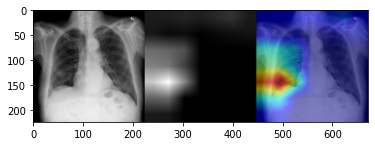

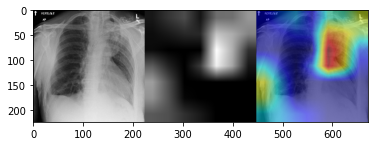

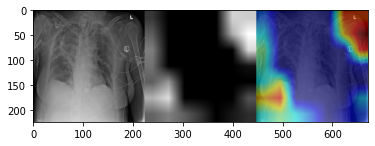

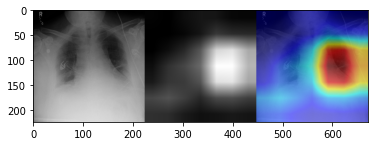

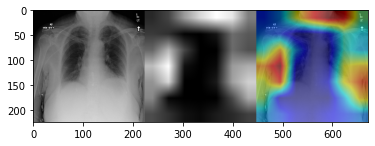

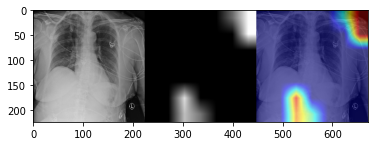

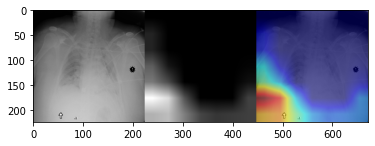

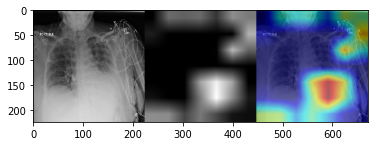

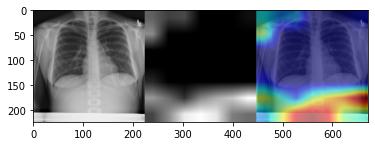

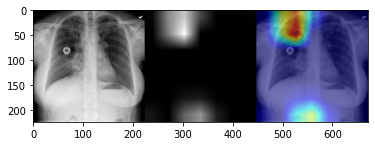

In [ ]:
_model_name = "../work_dirs/DenseNet121_ImageNet_20220709052011/DenseNet121_ImageNet_run_0.pth.tar"
checkpoint = torch.load(_model_name)

model, _ = Classifier_model('DenseNet121'.lower(), 14, weight=None,
                          linear_classifier=False, sobel=False,
                          activation="Sigmoid")
model.load_state_dict(checkpoint['state_dict'])
model.eval()


# fc_layer_specific_class = torch.nn.Linear(in_features=1024, out_features=1, bias=True)
# fc_layer_specific_class.weight.data = model.classifier[0].weight[0:1]
# fc_layer_specific_class.bias.data = model.classifier[0].bias[0:1]
# model.classifier = fc_layer_specific_class


if normalize.lower() == "imagenet":
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
elif normalize.lower() == "chestx-ray":
    mean = [0.5056, 0.5056, 0.5056]
    std = [0.252, 0.252, 0.252]
#     self.normalize = transforms.Normalize([0.5056, 0.5056, 0.5056], [0.252, 0.252, 0.252])





class_name = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltrate', 'Mass', 'Nodule',
                       'Pneumonia', 'Pneumothorax', 'Consolidation', 'Edema',
                       'Emphysema', 'Fibrosis', 'Pleural_Thickening', 'Hernia']


class_to_idx = {cls: idx for (idx, cls) in enumerate(class_name)}


# targets=None
target_layers = [model.features.denseblock4]


count = 0

for index, row in bbox_data.iterrows():
    class_idx = class_to_idx[row["Finding Label"]]
    print(row["Finding Label"], class_idx)
    targets = [ClassifierOutputTarget(class_idx)]
    image_name = row['Image Index']
    img = cv2.imread(image_root + '/' + image_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = np.float32(img) / 255
    input_tensor = preprocess_image(img, mean=mean, std=std)
    
    
    with GradCAM(model=model, target_layers=target_layers, use_cuda=True) as cam:
        grayscale_cams = cam(input_tensor=input_tensor, targets=targets)
        cam_image = show_cam_on_image(img, grayscale_cams[0, :], use_rgb=True)
        grayscale_cam = np.uint8(255*grayscale_cams[0, :])
        grayscale_cam = cv2.merge([grayscale_cam, grayscale_cam, grayscale_cam])
        images = np.hstack((np.uint8(255*img), grayscale_cam , cam_image))
        Image.fromarray(images)

        plt.figure()
        plt.imshow(images)
        count += 1
        if count == 10:
            break


In [ ]:
model.classifier[0]

Linear(in_features=1024, out_features=14, bias=True)

In [ ]:
_model_name = "../work_dirs/DenseNet121_ImageNet_20220709052011/DenseNet121_ImageNet_run_0.pth.tar"
checkpoint = torch.load(_model_name)

model, _ = Classifier_model('DenseNet121'.lower(), 14, weight=None,
                          linear_classifier=False, sobel=False,
                          activation="Sigmoid")
model.load_state_dict(checkpoint['state_dict'])
model.eval()
# model.cuda()
# model(input_tensor.cuda())

<All keys matched successfully>

Atelectasis 0
Atelectasis 0
Atelectasis 0
Atelectasis 0
Atelectasis 0
Atelectasis 0
Atelectasis 0
Atelectasis 0
Atelectasis 0
Atelectasis 0


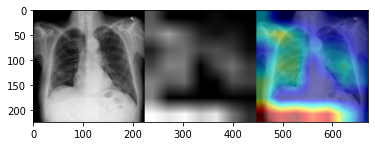

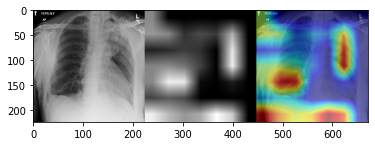

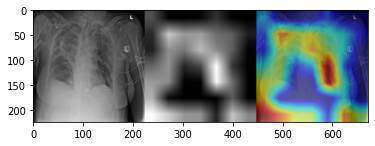

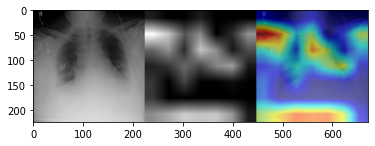

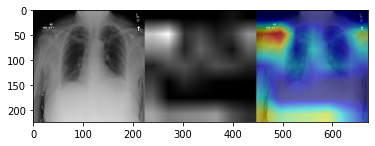

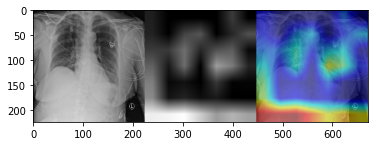

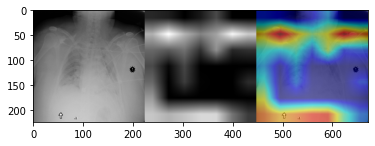

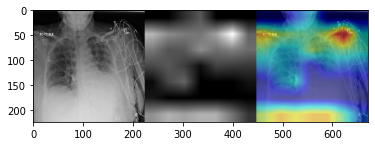

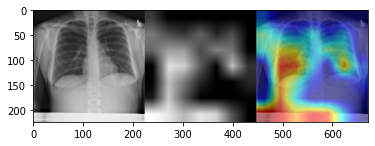

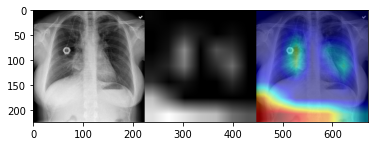

In [ ]:

# targets=None
target_layers = [model.features.denseblock4]
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)
count = 0
for index, row in bbox_data.iterrows():
    class_idx = class_to_idx[row["Finding Label"]]
    print(row["Finding Label"], class_idx)
    targets = [ClassifierOutputTarget(class_idx)]
    
    image_name = row['Image Index']
    img = cv2.imread(image_root + '/' + image_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = np.float32(img) / 255
    input_tensor = preprocess_image(img, mean=mean, std=std)
    grayscale_cams = cam(input_tensor=input_tensor, targets=targets)
    cam_image = show_cam_on_image(img, grayscale_cams[0, :], use_rgb=True)
    grayscale_cam = np.uint8(255*grayscale_cams[0, :])
    grayscale_cam = cv2.merge([grayscale_cam, grayscale_cam, grayscale_cam])
    images = np.hstack((np.uint8(255*img), grayscale_cam , cam_image))
    Image.fromarray(images)
    plt.figure()
    plt.imshow(images)
    count += 1
    if count == 10:
        break


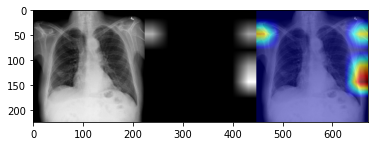

In [ ]:
cam_image = show_cam_on_image(img, grayscale_cams[0, :], use_rgb=True)